In [1]:
import sympy as sym
from sympy.physics.quantum import Operator,Dagger
from IPython.display import display
from sympy import init_printing
init_printing(use_latex=True)

In [2]:
#%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.linalg import svd
import matplotlib as mpl
import time
import sys
from math import factorial
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=30)
mpl.rc('ytick',labelsize=30)

### Linestyles ###
colors={'red':(241/255.,88/255.,84/255.),\
        'orange':(250/255,164/255.,58/255.),\
        'pink':(241/255,124/255.,176/255.),\
        'brown':(178/255,145/255.,47/255.),\
        'purple':(178/255,118/255.,178/255.),\
        'green':(96/255,189/255.,104/255.),\
        'darkgreen':(70/255,165/255.,80/255.),\
        'blue':(93/255,165/255.,218/255.),\
        'darkblue':(70/255,140/255.,195/255.),\
        'yellow':(222/255., 207/255., 63/255),\
        'black':(0.,0.,0.)}
collab = ['brown','green','blue','pink',"orange",'black']
linewidth = [2,2,3,3,4]
linestyle = ['solid','dashed','dashdot','dotted','solid']

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


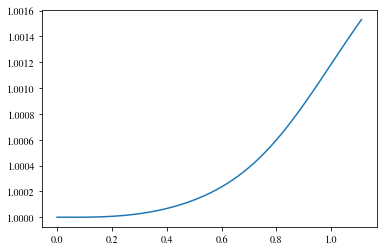

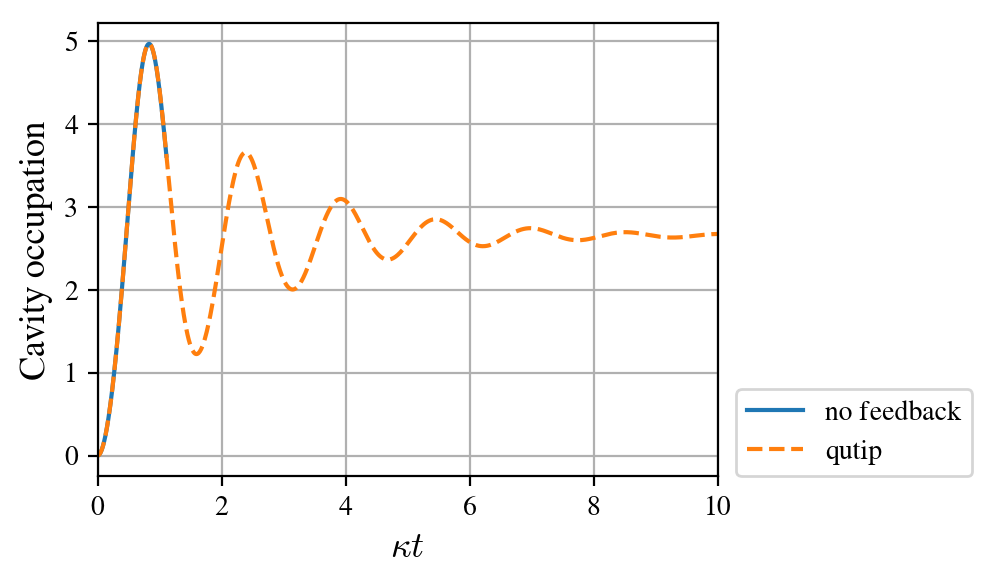

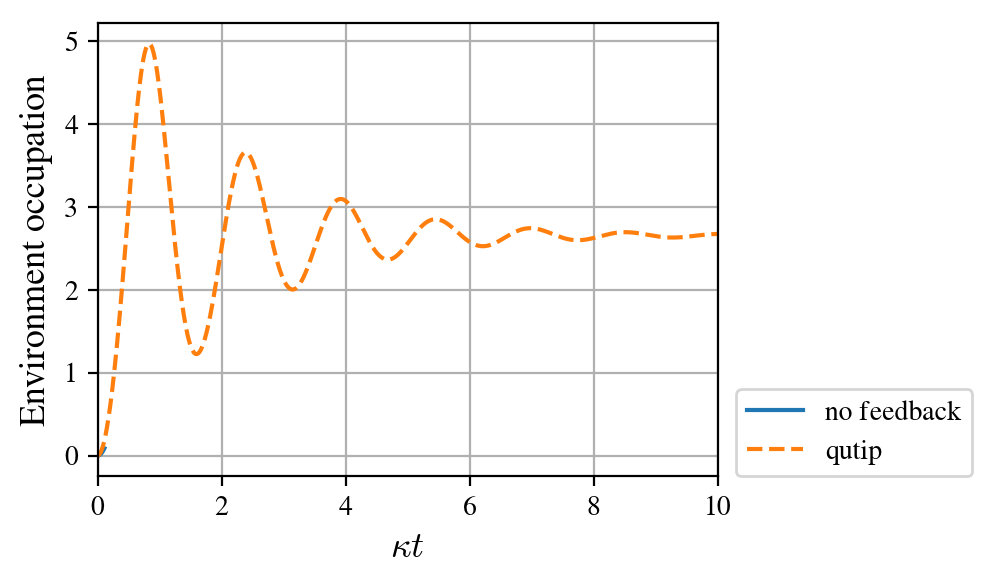

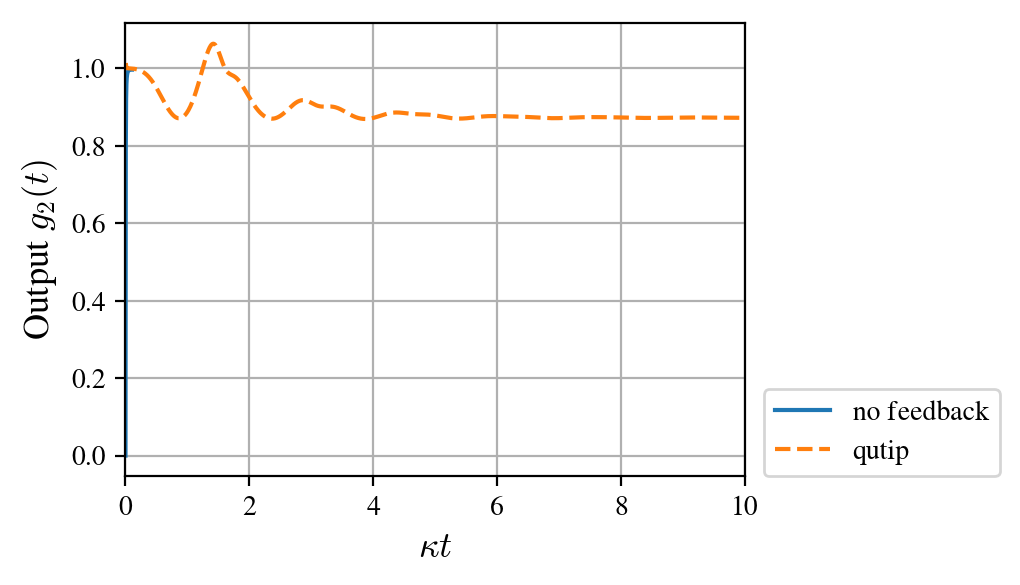

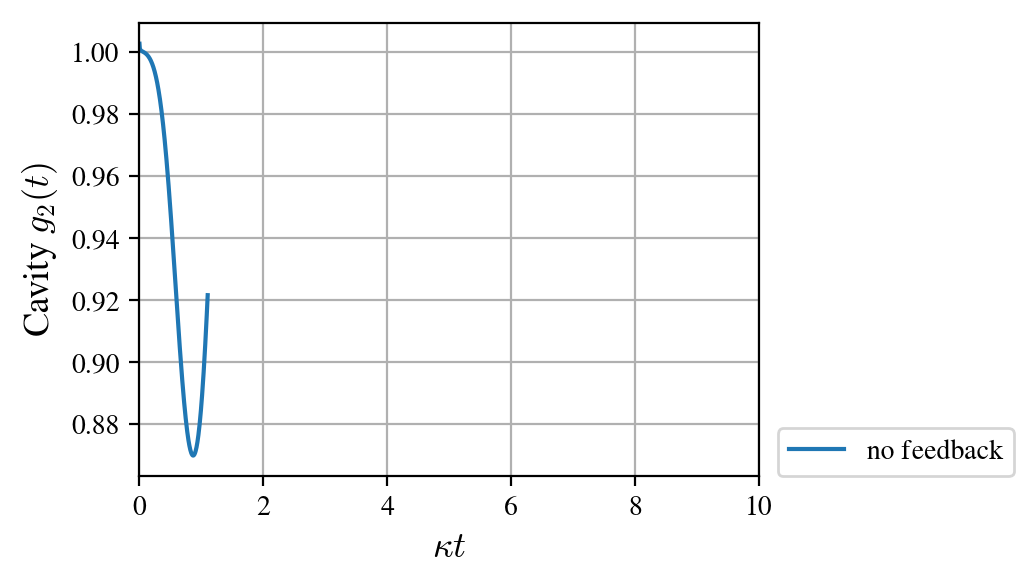

In [222]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from io import BytesIO
mpl.rc('xtick',labelsize=10)
mpl.rc('ytick',labelsize=10)

ID=0
def conv(x):
    return x.replace('+-', '-').encode()

dat1 = np.genfromtxt((conv(x) for x in \
#                      open("./Data/Kerr/evol%04d.txt"%0)),dtype=complex)
                      open("./Data/Kerr/evol%04d_cavity_drive.txt"%1)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_coherent_environment.txt"%31)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d.txt"%0)),dtype=complex)
#dat2 = np.genfromtxt((conv(x) for x in \
#                      open("./Data/Kerr/evol%04d_coherent_cavity.txt"%141)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_atom_drive.txt"%32)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_coherent_environment.txt"%32)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d.txt"%0)),dtype=complex)
#dat3 = np.genfromtxt((conv(x) for x in \
#                      open("./Data/Kerr/evol%04d_coherent_cavity.txt"%145)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_atom_drive.txt"%33)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_coherent_environment.txt"%33)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d.txt"%0)),dtype=complex)
datq = np.genfromtxt((conv(x) for x in \
                      open("./Data/Kerr/Qutip%04d_cavity_drive.txt"%1)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d.txt"%1)),dtype=complex)
#kap1=0.1
#kappa=0.12
#tau=1#0.4
dt=0.01
L=101#int(tau/dt+1)

t_1 = dat1[:,0]
norm_1 = dat1[:,1]
cav_1 = dat1[:,2]
g2c_1 = dat1[:,3]
g2_1 = dat1[:,4]
NB_1 = dat1[:,5]
t_q = datq[:,0]
cav_q = datq[:,1]
NB1_q = datq[:,2]
NB2_q = datq[:,3]
g21_q = datq[:,4]
g22_q = datq[:,5]
#t_2 = dat2[:,0]/tau
#norm_2 = dat2[:,1]
#cav_2 = dat2[:,2]
#g2c_2 = dat2[:,3]
#g2_2 = dat2[:,4]
#NB_2 = dat2[:,5]
#t_3 = dat3[:,0]/tau
#norm_3 = dat3[:,1]
#cav_3 = dat3[:,2]
#g2c_3 = dat3[:,3]
#g2_3 = dat3[:,4]
#NB_3 = dat3[:,5]

plt.figure(0)
plt.plot(t_1,norm_1)
#plt.plot(t_2,norm_2,ls="--")
#plt.plot(t_3,norm_3,ls="-.")
plt.figure(1,dpi=200,figsize=(4,3))
#plt.vlines(1,0,5,color="grey",linestyle=":")
plt.plot(t_1,cav_1,label="no feedback")
plt.plot(t_q,cav_q,label="qutip",ls="--")
#plt.plot(t_1,3*np.exp(-t_1),ls="--")
#plt.plot(t_2,cav_2,lw=2,ls="--",label="constr. feedback")
#plt.plot(t_3,cav_3,lw=2,ls="-.",label="destr. feedback")
plt.legend(loc = (1.03,.0))
plt.ylabel("Cavity occupation",fontsize = 13)
plt.xlim(0,10)
plt.xlabel("$\kappa t$",fontsize = 13)
plt.grid(True)
#plt.xlim(0,10)


plt.figure(3,dpi=200,figsize=(4,3))
plt.plot(t_1[L:]-1,NB_1[L:]/dt, label="no feedback")
plt.plot(t_q,NB2_q,label="qutip",ls="--")
#plt.plot(t_2[L:]-1,NB_2[L:]/dt, ls="--",label="constr. feedback")
#plt.plot(t_3[33:]-1,NB_3[33:]/dt, ls="-.",label="destr. feedback")
#plt.vlines(1,0,0.05,color="grey",linestyle=":")
#print(NB_2[L]/dt*np.exp(-1.*0.04),NB_1[L]/dt)
#print(NB_2[L]/dt*np.exp(-1.*0.16),NB_3[33]/dt)
#print(NB_1[L]/dt,NB_3[L]/dt,NB_2[L]/dt)
plt.grid(True)
plt.ylabel("Environment occupation",fontsize = 13)
plt.xlabel("$\kappa t$",fontsize = 13)
plt.legend(loc = (1.03,.0))
plt.xlim(0,10)

plt.figure(4,dpi=200,figsize=(4,3))
plt.plot(t_1[L:]-1,g2_1[L:], label="no feedback")
plt.plot(t_q,g22_q,label="qutip",ls="--")
#plt.plot(t_2[L:]-1,g2_2[L:],ls="--", label="constr. feedback")
#plt.plot(t_3[33:]-1,g2_3[33:], ls="-.",label="destr. feedback")
plt.ylabel("Output $g_2(t)$",fontsize = 13)
plt.xlabel("$\kappa t$",fontsize = 13)
plt.legend(loc = (1.03,.0))
#plt.xlim(0,5)
plt.grid(True)
plt.xlim(0,10)

plt.figure(5,dpi=200,figsize=(4,3))
plt.plot(t_1[1:-1],g2c_1[1:-1], label="no feedback")
#plt.plot(t_2[1:-1],g2c_2[1:-1],ls="--",label="constr. feedback")
#plt.plot(t_3[1:-1],g2c_3[1:-1], ls="-.",label="destr. feedback")
plt.legend(loc = (1.03,.0))
plt.grid(True)
plt.ylabel("Cavity $g_2(t)$",fontsize = 13)
plt.xlabel("$\kappa t$",fontsize = 13)
plt.xlim(0,10)


In [151]:
0.1/0.12

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


0.05
float64


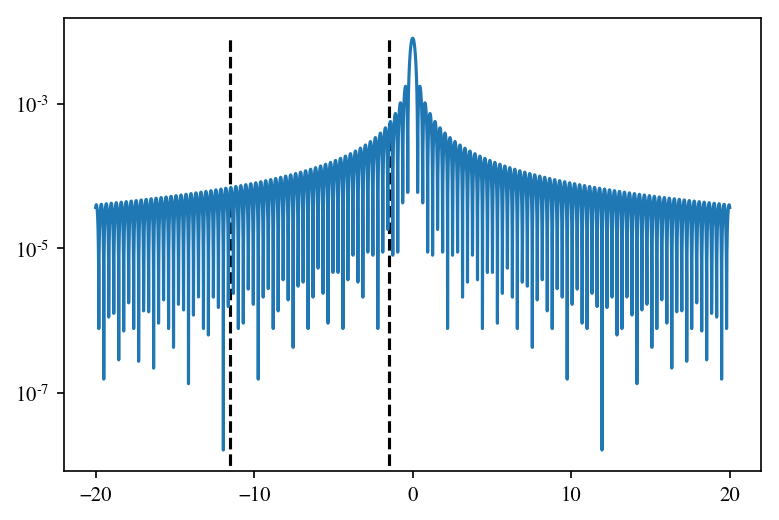

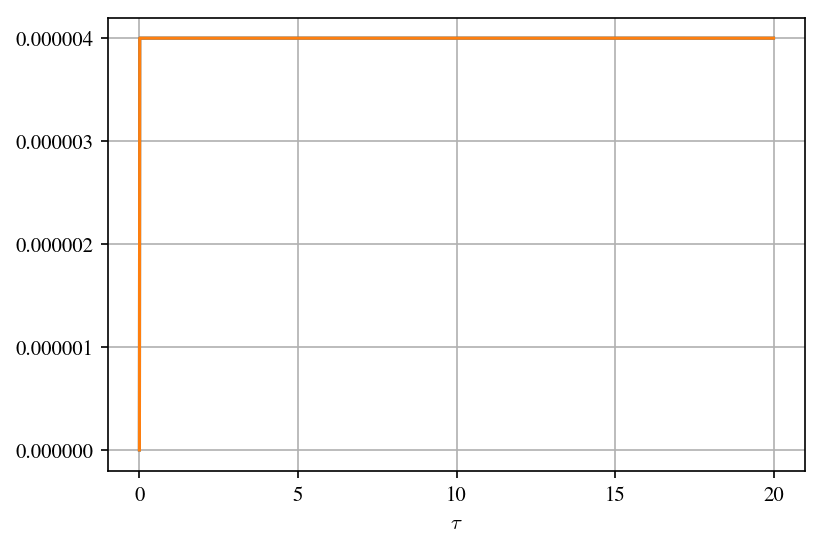

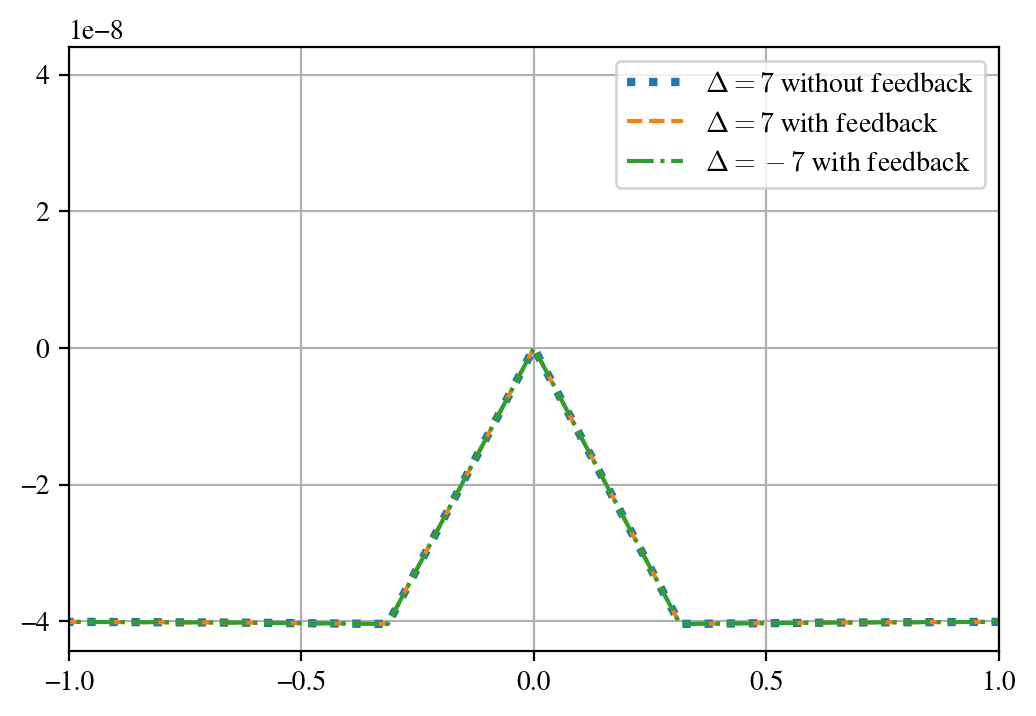

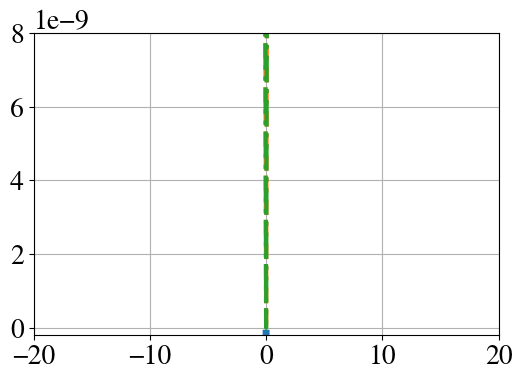

In [103]:
ID=120
mpl.rc('xtick',labelsize=10)
mpl.rc('ytick',labelsize=10)

dat1 = np.genfromtxt((conv(x) for x in \
                      open("./Data/Kerr/spec%04d_cavity_drive.txt"%(0))),dtype=complex)
#                      open("./Data/JC+fb/New/spec%04d_coherent_environment.txt"%(200))),dtype=complex)
datc1 = np.genfromtxt((conv(x) for x in \
                      open("./Data/Kerr/corr%04d_cavity_drive.txt"%0)),dtype=complex)
#                      open("./Data/JC+fb/New/corr%04d_coherent_environment.txt"%203)),dtype=complex)
datc2 = np.genfromtxt((conv(x) for x in \
                      open("./Data/Kerr/corr%04d_cavity_drive.txt"%0)),dtype=complex)
#                      open("./Data/JC+fb/New/corr%04d_coherent_environment.txt"%202)),dtype=complex)
datc3 = np.genfromtxt((conv(x) for x in \
                      open("./Data/Kerr/corr%04d_cavity_drive.txt"%0)),dtype=complex)
#                      open("./Data/JC+fb/New/corr%04d_coherent_environment.txt"%201)),dtype=complex)
#datsq = np.loadtxt("./Data/JC+fb/New/Spec_Qutip%04d_cavity_drive.txt"%210)
om = dat1[:,0]
spec=dat1[:,1]
tc1 = datc1[:,0]
corr1 = datc1[:,1]
tc2 = datc2[:,0]
corr2 = datc2[:,1]
tc3 = datc3[:,0]
corr3 = datc3[:,1]
#tc4 = datc4[:,0]
#corr4 = datc4[:,1]
#tc5 = datc5[:,0]
#corr5 = datc5[:,1]
#omq=datsq[:,0]
#specq=datsq[:,1]*0.002
kap=2
g=4
plt.figure(dpi=150)
plt.plot(om,spec)
#plt.plot(om,1/(om**2+(kap)**2)/50*2)
#plt.xlim(-10,10)
#plt.grid(True)
#plt.hlines(.5*np.max(spec),-10,10,linestyles="dashed")
plt.vlines(-11.5,-.0,np.max(spec),linestyles="dashed")
plt.vlines(-1.5,-.0,np.max(spec),linestyles="dashed")
plt.yscale("log")
#plt.vlines(kap,-.0,np.max(spec),linestyles="dashed")
#plt.vlines(-g,-.0,np.max(spec),linestyles="dashed")
#plt.vlines(g,-.0,np.max(spec),linestyles="dashed")
#plt.vlines(-np.sqrt(4)*g,-.0,np.max(spec),linestyles="dashed")
#plt.vlines(np.sqrt(4)*g,-.0,np.max(spec),linestyles="dashed")
plt.figure(dpi=150)
plt.grid(True)
plt.plot(tc3[0:],(corr3[0:])/0.01)
plt.plot(tc2[0:],(corr2[0:])/0.01)
#plt.plot(tc1[0:],(corr1[0:])/0.01)
#print(corr[1],corr[1]-corr[0]+0.01)
plt.xlabel("$\\tau$")
plt.figure(dpi=200)
fft_1 = np.fft.fftshift(np.fft.fft((corr1[0:]-np.average(corr1[0:]))[::-1]))
fft_2 = np.fft.fftshift(np.fft.fft((corr2[0:]-np.average(corr2[0:]))[::-1]))
fft_3 = np.fft.fftshift(np.fft.fft((corr3[0:]-np.average(corr3[0:]))[::-1]))
#fft_4 = np.fft.fftshift(np.fft.fft((corr4[1:]-np.average(corr4[1:]))[::-1]))
#fft_5 = np.fft.fftshift(np.fft.fft((corr5[1:]-np.average(corr5[1:]))[::-1]))
omp1 = np.fft.fftshift(np.fft.fftfreq(tc1[0:].shape[-1],np.real(tc1[1]-tc1[0])))
omp2 = np.fft.fftshift(np.fft.fftfreq(tc2[0:].shape[-1],np.real(tc2[1]-tc2[0])))
omp3 = np.fft.fftshift(np.fft.fftfreq(tc3[0:].shape[-1],np.real(tc3[1]-tc3[0])))
#omp4 = np.fft.fftshift(np.fft.fftfreq(tc4[1:].shape[-1],np.real(tc4[1]-tc4[0])))
#omp5 = np.fft.fftshift(np.fft.fftfreq(tc5[1:].shape[-1],np.real(tc5[1]-tc5[0])))
freq = np.linspace(-20,20,2000)
fft_1_bh=np.zeros(freq.shape,complex)
print(omp1[1]-omp1[0])
for i in range(len(corr1[0:])):
    fft_1_bh += (corr1[i]-np.average(corr1[:]))*np.exp(1j*freq*i*(tc1[1]-tc1[0]))
print(np.abs(fft_1_bh).dtype)
#plt.plot(freq,np.real(fft_1_bh),label="$\Delta=7$ without feedback",lw=3)
#plt.plot(omq,specq,label="$\Delta=7$ without feedback (Qutip)",lw=3)
plt.plot(omp1*2*np.pi,np.real(fft_1),label="$\Delta=7$ without feedback",ls=":",lw=3)
plt.plot(omp2*2*np.pi,np.real(fft_2),label="$\Delta=7$ with feedback",ls="--")
plt.plot(omp3*2*np.pi,np.real(fft_3),label="$\Delta=-7$ with feedback",ls="-.")
#plt.plot(omp4*2*np.pi,np.abs(fft_4),label="$\Delta=10$")
#plt.plot(omp5*2*np.pi,np.abs(fft_5),label="$\Delta=16$")
#plt.vlines(-8.9,np.min(np.abs(fft_3)),np.max(np.abs(fft_3)),color="grey",linestyles="--",label="$g$")
plt.xlim(-1,1)
plt.legend(loc="best")
plt.grid(True)
#plt.yscale("log")
mpl.rc('xtick',labelsize=20)
mpl.rc('ytick',labelsize=20)
plt.figure(dpi=100)
#plt.plot(omq,specq,label="$\Delta=7$ without feedback (Qutip)",lw=5)
plt.plot(omp1*2*np.pi,np.real(fft_1),label="$\Delta=7$ without feedback",ls=":",lw=5)
plt.plot(omp2*2*np.pi,np.abs(fft_2),label="$\Delta=7$ with feedback",ls="--",lw=3)
plt.plot(omp3*2*np.pi,np.abs(fft_3),label="$\Delta=-7$ with feedback",ls="-.",lw=3)
plt.xlim(-20,20)
plt.ylim(-2*10**(-10),.8*10**(-8))

plt.grid(True)

In [136]:
a = np.linspace(0,4,5)
a[0:5:2]

array([ 0.,  2.,  4.])

In [33]:
N_env=5
nBdiag = np.linspace(0,N_env,N_env+1).astype(np.int64)
nB = np.diag(nBdiag)
nB2 = np.diag(nBdiag-1)
g2Bop = nB*nB2
print(nB)
print(g2Bop)
dB  = sc.eye(N_env,N_env,1)*np.sqrt(dt*np.arange(0,N_env)) 
dBd = sc.eye(N_env,N_env,-1)*np.sqrt(dt*np.arange(1,N_env+1)) 
np.dot(dB,dBd)

[[0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 5]]
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 20]]


NameError: name 'dt' is not defined

In [20]:
dt = 0.01
dB  = sc.eye(N_env+1,N_env+1,1)*np.sqrt(dt*np.arange(0,N_env+1))
np.einsum("ij,ki,kl,lm->jm",np.conjugate(dB),np.conjugate(dB),dB,dB)/dt**2

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   2.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   6.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  12.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  20.]])

In [143]:
sum_NB = np.zeros(5001)
nu = np.linspace(-20,20,5001)
for j in range(5001):
    for i in range(NB_3.shape[0]):
        sum_NB[j] += np.real(np.sqrt(NB_3[-1]*NB_3[-(1+i)])*np.exp(1j*nu[j]*i*0.01)/0.01)*2
        
plt.figure(dpi=150)
plt.plot(nu,sum_NB)
plt.grid(True)

KeyboardInterrupt: 

In [168]:
t = np.linspace(0,50,5001)
a = (np.sin(1*np.pi*t)+np.sin(.2*np.pi*t))*np.exp(-t)

fres=10001
sum_a = np.zeros(fres)
#nu = np.linspace(-20,20,fres)
#for j in range(fres):
#    for i in range(a.shape[0]):
#        sum_a[j] += np.real(np.sqrt(a[-1]*a[-(1+i)])*np.exp(1j*nu[j]*i*(t[1]-t[0]))/(t[1]-t[0]))*2
        


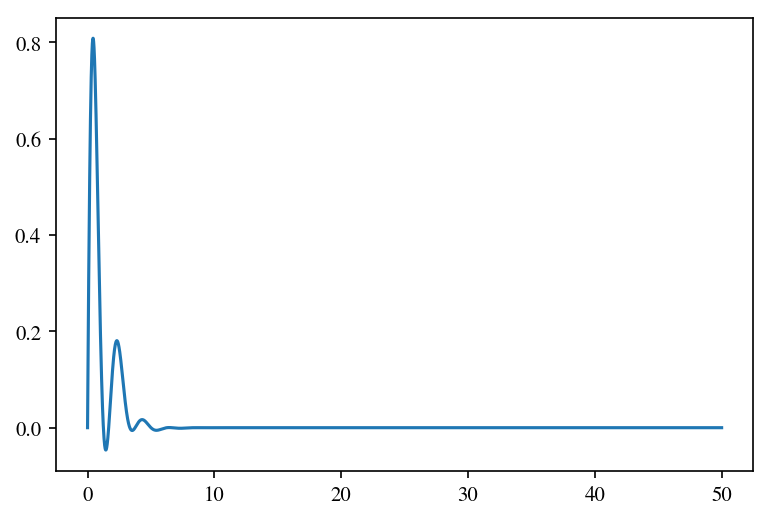

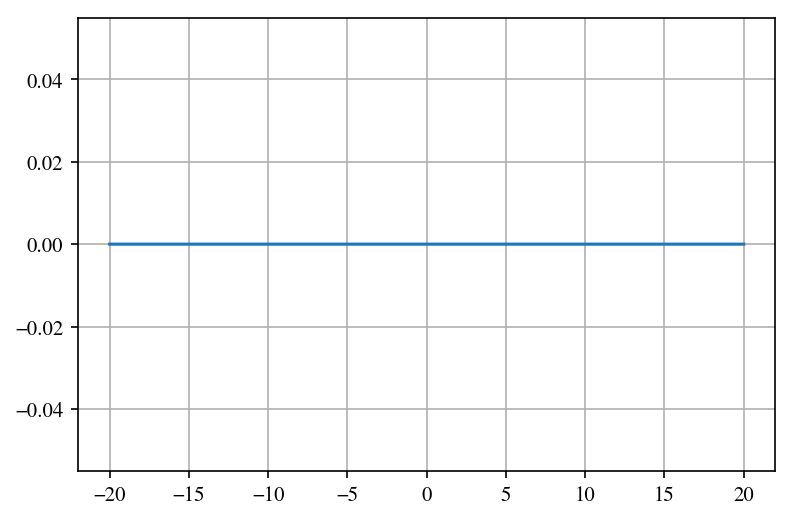

In [169]:
plt.figure(1,dpi=150)
plt.plot(t,a)
plt.figure(2,dpi=150)
plt.plot(nu,sum_a)
plt.grid(True)


0.01
0.0199960007998


/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


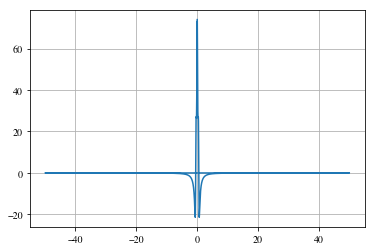

In [171]:
sp = np.fft.fft(a)
print(t[1]-t[0])
freq = np.fft.fftfreq(t.shape[-1],(t[1]-t[0]))
print(freq[1]-freq[0])
plt.plot(freq,sp)
#plt.xlim(-10,10)
plt.grid(True)